# Machine Learning and Public Policy: Diagnostic

### March 29th, 2017

J. Adrian Sanchez Castro

## Problem 1: Data Acquisition and Analysis

In [81]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import numpy as np

In [82]:
!pwd

/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic


### Checkout number of columns and rows in files"

In [83]:
!cd data && pwd && ls -1


/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data
graffiti.csv
pothole.csv
sanitation.csv
vacant.csv


In [84]:
!awk -F, 'END {printf "Number of Rows : %s\nNumber of Columns = %s\n", NR, NF}' /Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/graffiti.csv

Number of Rows : 117037
Number of Columns = 19


In [85]:
!awk -F, 'END {printf "Number of Rows : %s\nNumber of Columns = %s\n", NR, NF}' /Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/pothole.csv

Number of Rows : 55596
Number of Columns = 20


In [86]:
!awk -F, 'END {printf "Number of Rows : %s\nNumber of Columns = %s\n", NR, NF}' /Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/sanitation.csv

Number of Rows : 21445
Number of Columns = 17


In [87]:
!awk -F, 'END {printf "Number of Rows : %s\nNumber of Columns = %s\n", NR, NF}' /Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/vacant.csv

Number of Rows : 4758
Number of Columns = 24


## Pandas importation

In [88]:
path ='/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data'
csv_files = glob.glob(path + "/*.csv")    
csv_files


['/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/graffiti.csv',
 '/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/pothole.csv',
 '/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/sanitation.csv',
 '/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/vacant.csv']

In [89]:
graffiti = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/graffiti.csv')
pothole = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/pothole.csv')
sanitation = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/sanitation.csv')
vacant = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/vacant.csv')


# GRAFFITI dataset

### checkout very quickly columns and data before importation

In [90]:
!cd data && head -n 2 graffiti.csv

Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
03/30/2016,Completed,03/30/2016,16-02134145,Graffiti Removal,Glass,Front,531 N CLARK ST,60654,1175441.77867511,1903914.93022029,42,18,8,,41.89170969838417,-87.63098218718851,"(41.89170969838417, -87.63098218718851)"


In [91]:
graffiti.dtypes

Creation Date                                object
Status                                       object
Completion Date                              object
Service Request Number                       object
Type of Service Request                      object
What Type of Surface is the Graffiti on?     object
Where is the Graffiti located?               object
Street Address                               object
ZIP Code                                    float64
X Coordinate                                float64
Y Coordinate                                float64
Ward                                        float64
Police District                             float64
Community Area                              float64
SSA                                         float64
Latitude                                    float64
Longitude                                   float64
Location                                     object
dtype: object

In [125]:
graffiti.shape

(31527, 12)

### Let's throw out na's

In [98]:
graffiti = graffiti.dropna()

In [99]:
graffiti.shape

(31527, 18)

### Change type of columns to categoric variables

In [100]:
graffiti['location-tuple'] = list(zip(graffiti.Latitude, graffiti.Longitude))

In [101]:
float64= graffiti.dtypes[graffiti.dtypes == "float64"].index

for i in float64:
    graffiti[i] = graffiti[i].astype(str)

### Check range of "Creation date" of one year

In [102]:
graffiti.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location,location-tuple
5,03/30/2016,Completed,03/30/2016,16-02134350,Graffiti Removal,Brick - Unpainted,Front,1417 W CHICAGO AVE,60642.0,1166719.71988,1905455.26337,27.0,12.0,24.0,29.0,41.8960278329,-87.6631098124,"(41.896027832938266, -87.66310981240575)","(41.8960278329, -87.6631098124)"
32,03/30/2016,Completed,03/30/2016,16-02131169,Graffiti Removal,Metal - Painted,Front,4630 S KEDZIE AVE,60632.0,1155814.04228,1873758.97273,14.0,8.0,58.0,39.0,41.8089957582,-87.7041566003,"(41.80899575815653, -87.7041566002847)","(41.8089957582, -87.7041566003)"
33,03/30/2016,Completed,03/30/2016,16-02131193,Graffiti Removal,Metal - Painted,Front,7060 S KEDZIE AVE,60629.0,1156260.267,1857544.49411,17.0,8.0,66.0,3.0,41.7644253127,-87.7029602973,"(41.764425312726615, -87.70296029726426)","(41.7644253127, -87.7029602973)"
47,03/30/2016,Completed,03/30/2016,16-02131914,Graffiti Removal,Brick - Painted,Side,3211 W 43RD ST,60632.0,1155610.53451,1875957.41617,14.0,8.0,58.0,39.0,41.8153275085,-87.7047168123,"(41.81532750851539, -87.70471681229976)","(41.8153275085, -87.7047168123)"
48,03/30/2016,Completed,03/30/2016,16-02132022,Graffiti Removal,Wood - Painted,Garage,4301 S SAWYER AVE,60632.0,1155399.83979,1875950.64279,14.0,8.0,58.0,39.0,41.8153344507,-87.7053371483,"(41.81533445067502, -87.70533714831333)","(41.8153344507, -87.7053371483)"


In [103]:
graffiti.tail()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location,location-tuple
117031,03/28/2017,Completed,03/28/2017,17-01734474,Graffiti Removal,Brick - Painted,Front,5730 N WINTHROP AVE,60660.0,1167830.33953,1938225.0743,48.0,20.0,77.0,26.0,41.986420969,-87.6582503361,"(41.98642096903268, -87.6582503361241)","(41.986420969, -87.6582503361)"
117032,03/28/2017,Completed,03/28/2017,17-01734478,Graffiti Removal,Brick - Painted,Front,5732 N WINTHROP AVE,60660.0,1167829.83953,1938238.4743,48.0,20.0,77.0,26.0,41.9864775834,-87.6582521015,"(41.98647758340539, -87.65825210150162)","(41.9864775834, -87.6582521015)"
117033,03/28/2017,Completed,03/28/2017,17-01734481,Graffiti Removal,Brick - Painted,Front,5734 N WINTHROP AVE,60660.0,1167829.43953,1938251.9743,48.0,20.0,77.0,26.0,41.9865341978,-87.6582538669,"(41.98653419777755, -87.65825386688162)","(41.9865341978, -87.6582538669)"
117034,03/28/2017,Completed,03/28/2017,17-01734483,Graffiti Removal,Brick - Painted,Front,5736 N WINTHROP AVE,60660.0,1167829.03953,1938265.3743,48.0,20.0,77.0,26.0,41.9865908121,-87.6582556323,"(41.986590812149146, -87.65825563226409)","(41.9865908121, -87.6582556323)"
117035,03/28/2017,Completed,03/28/2017,17-01734488,Graffiti Removal,Brick - Painted,Front,5738 N WINTHROP AVE,60660.0,1167828.63953,1938278.7743,48.0,20.0,77.0,26.0,41.9866474265,-87.6582573976,"(41.98664742652018, -87.65825739764902)","(41.9866474265, -87.6582573976)"


### List of Columns

In [126]:
list(graffiti)

['Creation Date',
 'Status',
 'Completion Date',
 'Type of Service Request',
 'What Type of Surface is the Graffiti on?',
 'Where is the Graffiti located?',
 'Street Address',
 'ZIP Code',
 'Latitude',
 'Longitude',
 'Location',
 'location-tuple']

In [105]:
columns_to_erase = ['Service Request Number','X Coordinate', 'Y Coordinate','Ward','Police District','Community Area','SSA']

for i in columns_to_erase:
    del graffiti[i]  # delete columns
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,Latitude,Longitude,Location,location-tuple
5,03/30/2016,Completed,03/30/2016,Graffiti Removal,Brick - Unpainted,Front,1417 W CHICAGO AVE,60642.0,41.8960278329,-87.6631098124,"(41.896027832938266, -87.66310981240575)","(41.8960278329, -87.6631098124)"
32,03/30/2016,Completed,03/30/2016,Graffiti Removal,Metal - Painted,Front,4630 S KEDZIE AVE,60632.0,41.8089957582,-87.7041566003,"(41.80899575815653, -87.7041566002847)","(41.8089957582, -87.7041566003)"
33,03/30/2016,Completed,03/30/2016,Graffiti Removal,Metal - Painted,Front,7060 S KEDZIE AVE,60629.0,41.7644253127,-87.7029602973,"(41.764425312726615, -87.70296029726426)","(41.7644253127, -87.7029602973)"
47,03/30/2016,Completed,03/30/2016,Graffiti Removal,Brick - Painted,Side,3211 W 43RD ST,60632.0,41.8153275085,-87.7047168123,"(41.81532750851539, -87.70471681229976)","(41.8153275085, -87.7047168123)"
48,03/30/2016,Completed,03/30/2016,Graffiti Removal,Wood - Painted,Garage,4301 S SAWYER AVE,60632.0,41.8153344507,-87.7053371483,"(41.81533445067502, -87.70533714831333)","(41.8153344507, -87.7053371483)"


In [106]:
new_zip = np.array([zipcode[0:5] for zipcode in graffiti['ZIP Code']])
graffiti['ZIP Code'] = new_zip

### Description of categorical variables


In [107]:
categorical = graffiti.dtypes[graffiti.dtypes == "object"].index
graffiti[categorical].describe()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,Latitude,Longitude,Location,location-tuple
count,31527,31527,31527,31527,31527,31527,31527,31527,31527,31527,31527,31527
unique,364,2,252,1,17,20,17772,44,17471,17471,17471,17471
top,06/07/2016,Completed,05/02/2016,Graffiti Removal,Metal - Painted,Front,1348 N MILWAUKEE AVE,60622,41.906236605,-87.6712133484,"(41.90623660501344, -87.67121334839456)","(41.906236605, -87.6712133484)"
freq,233,30434,250,31527,11367,10466,43,3843,43,43,43,43


### unique values 

In [108]:
graffiti['What Type of Surface is the Graffiti on?'].unique()

array(['Brick - Unpainted', 'Metal - Painted', 'Brick - Painted',
       'Wood - Painted', 'Metal - Unpainted', 'Marble/Granite',
       'Cement (Sidewalk, Alley, Wall, Curb)', 'Limestone', 'Stucco',
       'Vinyl Siding', 'Other/Unknown Surface', 'Other / Unknown Surface',
       'Asphalt', 'Aluminum Siding', 'Glass', 'Wood - Unpainted', 'Tree'], dtype=object)

In [109]:
graffiti['Where is the Graffiti located?'].unique()

array(['Front', 'Side', 'Garage', 'Rear', 'Bench', 'Door',
       'Traffic Control Box', 'Pole', 'Sign', 'Newspaper Box',
       'Garbage Cart', 'Alley', 'Fence', 'Dumpster', 'Mail Box', 'Viaduct',
       'Overpass', 'Phone', 'Hydrant', 'Express Way Job'], dtype=object)

### Let's see where are the most request zipcodes zones'

In [110]:
graffiti['ZIP Code'].unique()

array(['60642', '60632', '60629', '60647', '60622', '60628', '60657',
       '60625', '60613', '60623', '60618', '60640', '60609', '60659',
       '60645', '60643', '60614', '60619', '60634', '60626', '60602',
       '60617', '60601', '60649', '60608', '60660', '60641', '60653',
       '60615', '60612', '60620', '60637', '60636', '60655', '60610',
       '60607', '60646', '60661', '60624', '60651', '60603', '60605',
       '60604', '60638'], dtype=object)

In [111]:
sns.set_context("paper")

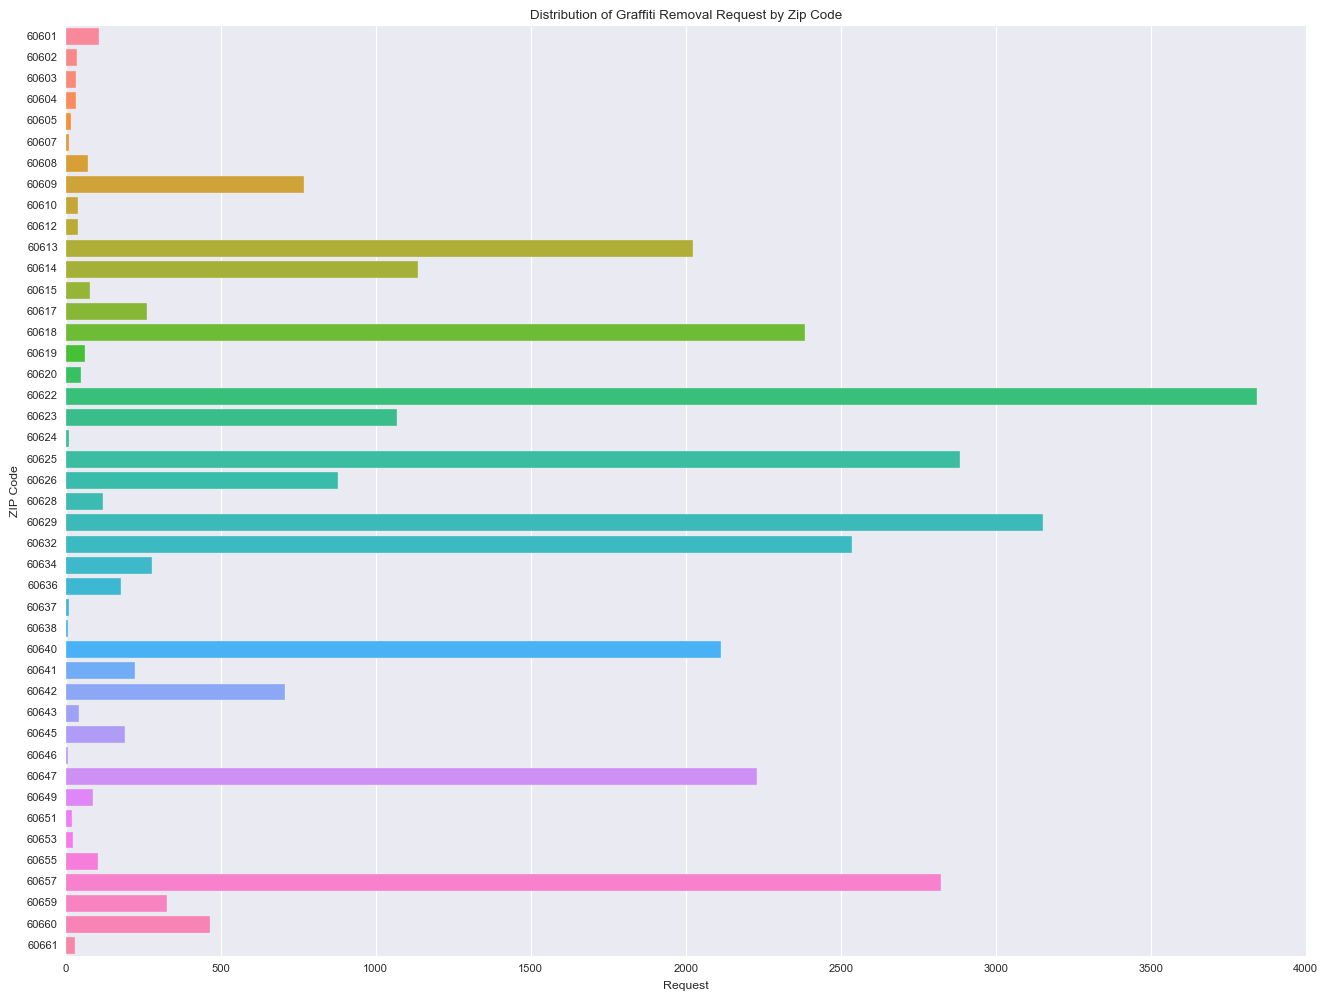

In [112]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='ZIP Code', saturation= 1, data=graffiti)
plt.title('Distribution of Graffiti Removal Request by Zip Code')
plt.xlabel('Request')

In [113]:
histo_graffiti = graffiti['ZIP Code'].value_counts()
histo_graffiti.iloc[:10]

60622    3843
60629    3154
60625    2886
60657    2822
60632    2536
60618    2386
60647    2230
60640    2114
60613    2022
60614    1135
Name: ZIP Code, dtype: int64

## Heatmap of the Graffiti removal request

In [123]:
import os
import gmaps

In [124]:
gmaps.configure(api_key='*')

In [116]:
import gmaps.datasets

In [117]:
ubicacion = list(graffiti['location-tuple'])

In [118]:
ubicacion[0]

(41.896027832938266, -87.663109812405764)

In [119]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion))
m

## What type of location do the "bad guys" makes graffitis?

In [121]:
histo_place = graffiti['Where is the Graffiti located?'].value_counts()
histo_place.iloc[:10]

Front                  10466
Side                    4413
Pole                    2701
Rear                    2394
Dumpster                1858
Alley                   1821
Traffic Control Box     1528
Door                    1383
Garage                  1306
Sign                     838
Name: Where is the Graffiti located?, dtype: int64

## In What type of surface?

In [122]:
histo_place = graffiti['What Type of Surface is the Graffiti on?'].value_counts()
histo_place.iloc[:10]

Metal - Painted                         11367
Brick - Painted                          5983
Brick - Unpainted                        5575
Wood - Painted                           1781
Cement (Sidewalk, Alley, Wall, Curb)     1756
Metal - Unpainted                        1256
Glass                                    1047
Aluminum Siding                           703
Other/Unknown Surface                     540
Other / Unknown Surface                   457
Name: What Type of Surface is the Graffiti on?, dtype: int64